<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Filmes_no_Brasil_2009_2019_An%C3%A1lise_de_Dados_em_Python_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Aumentando meu nível

https://www.kaggle.com/joaoavf/introducao-a-analise-de-dados-python-e-pandas

https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados/

https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093

Aula 2<br>
https://www.youtube.com/watch?v=2oZHg3HOtcY&t=3243s

10 minutes to pandas<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html



#### Analizando problemas de dados no Dataframe  
df.shape    # verifica o tamanho do dataframe   (linhas, colunas)<br>
df.dtypes   # todas colunas e os tipos [object(texto ou não sabe o que é)]<br>

*   Item da lista
*   Item da lista


df.describe()<br>
df.info()<br>
df.head(4)<br>
df.sample(10)   #lista linhas aleatórias<br>
df.tail()<br>
df.isnull().sum() retorna o número de valores ausentes para cada coluna.<br>
df.isnull().sum().sum() retorna o número total de valores ausentes.<br>
descobrir a porcentagem de valores que estão faltando, executando: df.isna().mean()<br>
    🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗🠗<br>
help(pd.Series.loc) pedindo ajuda<br>

#Análise de dados de filmes exibidos no Brasil de 2009 a 2019

#####Com base nos dados da Ancine (https://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil

Arquivo -> filmes_no_Brasil_2009_2019.xlsx



In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# carrega um dataframe com base no arquivo excel sem as 2 primeiras linhas do titulo e chute as 20 ultimas linhas
df = pd.read_excel('https://github.com/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/filmes_no_Brasil_2009_2019.xlsx?raw=true', skiprows=2 ,skipfooter=20)
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [3]:
df.shape

(7081, 11)

In [4]:
df.describe()

,Ano de exibição
count,7081.000000
mean,2014.339924
std,3.106327
min,2009.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2019.000000


In [5]:
df.sample(5)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6039,2010,Abraços Partidos,E1402604700000,Ficção,Espanha,Estrangeira,40151,Universal,Distribuição Internacional,74051,660825
3543,2015,Star Wars: Episódio V - O Império Contra-Ataca,E1402767000000,Ficção,Estados Unidos,Estrangeira,Relançamento,Fox,Distribuição Internacional,195,3055
6793,2009,Juízo Final,E1600563600000,Ficção,Inglaterra,Estrangeira,40046,Europa,Distribuição Nacional,50330,375094
5185,2012,Meia-noite em Paris,E1600219100000,Ficção,"Espanha, Estados Unidos",Estrangeira,40711,Paris,Distribuição Nacional,262,2157.06
1384,2018,Wheely,E1800347600000,Animação,Malásia,Estrangeira,43349,Playarte,Distribuição Nacional,13384,196138


In [6]:
df.tail()   # nan  = not a number

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276
7080,2009,Última Parada - 174,B0800914800000,Ficção,Brasil,Brasileira,39745,Paramount,Distribuição Internacional,2107,8954


In [7]:
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [8]:
df.dtypes


Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [9]:
#----1
# Transformar o campo Data de lançamento em data
#df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

In [10]:
#---2
# identificar o problema da coluna Data de lançamento
df['Data de lançamento'].value_counts() 


Relançamento    198
41264            33
42341            33
41607            29
41215            27
               ... 
39879             1
41922             1
41913             1
40328             1
43364             1
Name: Data de lançamento, Length: 878, dtype: int64

In [11]:
#---3
# exibir Data de lançamento  como relançamento
df[df['Data de lançamento'] == 'Relançamento']

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6,2019,A Bela da Tarde,E1700492900000,Ficção,"França, Itália",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,14,253
278,2019,Gritos e Sussurros,E1600273100000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,105,1024
359,2019,Matrix,E1500096600000,Ficção,"Austrália, Estados Unidos",Estrangeira,Relançamento,Warner,Distribuição Internacional,18260,277563
390,2019,Morangos Silvestres,E1500804700000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,129,1230
396,2019,Mulholland Drive - Cidade dos Sonhos,E1700486000000,Ficção,"Estados Unidos, França",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,50,920
...,...,...,...,...,...,...,...,...,...,...,...
6503,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33,154.5
6738,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268,944
6917,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora Filmes,Distribuição Nacional,5026,29614
6965,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230,2300


#### Decisão sobre dados incorretos/ faltantes/divergentes

apagar?   atualizar manual os dados? o que fazer? Qual decisão?

In [12]:
df.shape

(7081, 11)

In [13]:
#---4
#criar(copia) um novo dataframe sem as linhas Relançamentos (-198 linhas)
df_novo = df[df['Data de lançamento'] != 'Relançamento']
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [14]:
# del
df_novo[-5:].T

,7076,7077,7078,7079,7080
Ano de exibição,2009,2009,2009,2009,2009
Título da obra,Xuxa Gêmeas,Zico na Rede,À Deriva,É Proibido Fumar,Última Parada - 174
CPB/ROE,B0600616500000,B0901041400000,B0901015000000,B0901108700000,B0800914800000
Gênero,Ficção,Documentário,Ficção,Ficção,Ficção
País(es) produtor(es) da obra,Brasil,Brasil,"Brasil, Estados Unidos",Brasil,Brasil
Nacionalidade da obra,Brasileira,Brasileira,Brasileira,Brasileira,Brasileira
Data de lançamento,39066,39997,40025,40151,39745
Empresa distribuidora,Fox,Business Telecom,Universal,Playarte,Paramount
Origem da empresa distribuidora,Distribuição Internacional,Distribuição Nacional,Distribuição Internacional,Distribuição Nacional,Distribuição Internacional
Público no ano de exibição,1671,546,94588,33291,2107


In [15]:
df_novo.shape

(6883, 11)

In [16]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [17]:
#---5
# converter a coluna Data de lançamento para datetime
# df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

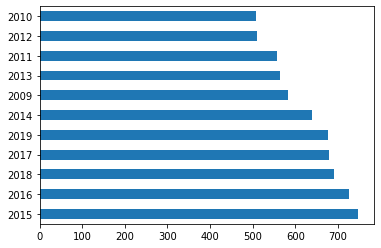

In [18]:
df_novo['Ano de exibição'].value_counts().plot.barh()

In [19]:
df_novo.rename(columns={'Público no ano de exibição': 'Publico'}, inplace = True)   # troca o nome de uma coluna

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df_novo

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531
...,...,...,...,...,...,...,...,...,...,...,...
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276


In [21]:
df_novo['Publico'].sample(25)

638         325
2225      82829
6307       1916
979         125
4477         98
3896     141404
643         165
1713          7
1483         28
3478       9560
1782       1496
530      211686
24            6
283      117058
4144      20552
1174       9077
5745      11307
6408          1
2236       2572
2010      11288
7028       5035
1748         43
2801       6738
6874    2083246
4193        668
Name: Publico, dtype: object

In [22]:

df_novo[df_novo['Publico'] == 'ND'].value_counts

<bound method DataFrame.value_counts of       Ano de exibição  ... Renda (R$) no ano de exibição
81               2019  ...                            ND
125              2019  ...                            ND
158              2019  ...                            ND
203              2019  ...                            ND
221              2019  ...                            ND
229              2019  ...                            ND
3993             2014  ...                            ND
4116             2014  ...                            ND
4429             2013  ...                            ND
4446             2013  ...                            ND
4491             2013  ...                            ND
4778             2013  ...                            ND
4846             2013  ...                            ND
4989             2012  ...                            ND
5012             2012  ...                            ND
5050             2012  ...                      

In [23]:
df_novo['Publico'].shape

(6883,)

In [24]:
df_novo = df_novo[df_novo['Publico'] != 'ND']
df_novo.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [25]:
df_novo['Publico'] = pd.to_numeric(df_novo['Publico'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Publico                             int64
Renda (R$) no ano de exibição      object
dtype: object

In [27]:
df_novo[df_novo['Publico'] == df_novo['Publico'].max()].head(3)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,43580,Disney,Distribuição Internacional,19656467,338624881


In [28]:
df_novo['Renda (R$) no ano de exibição'].sample(25)

3384    1.13383e+06
6092           8743
5639        28642.5
121            4376
2467         245701
4523         181710
1514    4.89457e+06
2743    9.44821e+06
6166        9104.56
1776             27
7052            149
1385         100393
880             568
6122         287803
1454       12199295
6480             50
1920    1.84091e+07
5382        1724692
478             255
3442        43810.4
840           13061
2368      118081264
798         2682351
5706         330922
3120            846
Name: Renda (R$) no ano de exibição, dtype: object

In [29]:

df_novo[df_novo['Renda (R$) no ano de exibição'] == 'ND'].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [Ano de exibição, Título da obra, CPB/ROE, Gênero, País(es) produtor(es) da obra, Nacionalidade da obra, Data de lançamento, Empresa distribuidora, Origem da empresa distribuidora, Publico, Renda (R$) no ano de exibição]
Index: []>

In [30]:
df_novo['Renda (R$) no ano de exibição'].shape

(6854,)

In [31]:
df_novo = df_novo[df_novo['Renda (R$) no ano de exibição'] != 'ND']
df_novo.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531


In [32]:
df_novo['Renda (R$) no ano de exibição'] = pd.to_numeric(df_novo['Renda (R$) no ano de exibição'])

In [33]:
df_novo.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Empresa distribuidora               object
Origem da empresa distribuidora     object
Publico                              int64
Renda (R$) no ano de exibição      float64
dtype: object

In [34]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,43580,Disney,Distribuição Internacional,19656467,338624881.0


In [35]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].min()].head(4)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Publico,Renda (R$) no ano de exibição
849,2018,Colo*,E1700484800000,Ficção,Portugal,Estrangeira,43055,Zeta Filmes,Distribuição Nacional,0,0.0
862,2018,Coragem! As Muitas Vidas do Cardeal Dom Paulo ...,B1700537400000,Documentário,Brasil,Brasileira,43083,TV Meio Ambiente,Distribuição Nacional,0,0.0
996,2018,Jesus - A Esperança*,B1700447200000,Ficção,Brasil,Brasileira,43083,Moro Comunicação,Distribuição Nacional,0,0.0
1030,2018,Macaco Tião - O Candidato do Povo*,B1700051900000,Documentário,Brasil,Brasileira,43083,Pipa Produções,Distribuição Nacional,0,0.0


In [36]:
df_novo['Nacionalidade da obra'].value_counts()


Estrangeira    4753
Brasileira     2101
Name: Nacionalidade da obra, dtype: int64

In [37]:
# del
df.isnull().sum()

Ano de exibição                    0
Título da obra                     0
CPB/ROE                            0
Gênero                             0
País(es) produtor(es) da obra      0
Nacionalidade da obra              0
Data de lançamento                 0
Empresa distribuidora              0
Origem da empresa distribuidora    0
Público no ano de exibição         0
Renda (R$) no ano de exibição      0
dtype: int64

In [38]:
df

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,43104,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,43559,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,43601,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,41879,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,43237,Playarte,Distribuição Nacional,402,3531
...,...,...,...,...,...,...,...,...,...,...,...
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,39066,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,39997,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,40025,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,40151,Playarte,Distribuição Nacional,33291,303276


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ano de exibição                  7081 non-null   int64 
 1   Título da obra                   7081 non-null   object
 2   CPB/ROE                          7081 non-null   object
 3   Gênero                           7081 non-null   object
 4   País(es) produtor(es) da obra    7081 non-null   object
 5   Nacionalidade da obra            7081 non-null   object
 6   Data de lançamento               7081 non-null   object
 7   Empresa distribuidora            7081 non-null   object
 8   Origem da empresa distribuidora  7081 non-null   object
 9   Público no ano de exibição       7081 non-null   object
 10  Renda (R$) no ano de exibição    7081 non-null   object
dtypes: int64(1), object(10)
memory usage: 608.6+ KB


In [45]:
df[['Ano de exibição','Empresa distribuidora','Título da obra',"Renda (R$) no ano de exibição"]].sample(10)

,Ano de exibição,Empresa distribuidora,Título da obra,Renda (R$) no ano de exibição
6260,2010,Universal,Nanny McPhee e as lições mágicas,1592538
4924,2012,Paris,A Dançarina e o Ladrão,795042
6336,2010,Raiz Distribuidora,Onde Andará Dulce Veiga?,7500
6803,2009,Sony,Leonera,18215
6293,2010,Califórnia,O Estudante (2010),34647.8
4361,2013,Diamond Films,A fuga do planeta Terra,2.0935e+06
6111,2010,Sony,Caçador de recompensas,5.78528e+06
2872,2015,UCI,A Audiência,6989
5039,2012,Imovision,Cairo 678,123332
5900,2011,Downtown,Sequestro,8114
